In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Load your dataset
data = pd.read_csv('/Users/tergel.s/Downloads/bank.csv')

# Split the data into features (X) and target (y)
X = data['Description']  # Description as input feature
y = data['Food or not?']  # Food or not food as the target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a TF-IDF vectorizer for text data
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')

# Fit and transform the vectorizer on the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the testing data using the same vectorizer
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize and train a Multinomial Naïve Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train_tfidf, y_train)

# Predict the categories on the test data
y_pred = classifier.predict(X_test_tfidf)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:\n', classification_report_output)



Accuracy: 0.69
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.47      0.58        15
           1       0.65      0.88      0.75        17

    accuracy                           0.69        32
   macro avg       0.71      0.67      0.67        32
weighted avg       0.71      0.69      0.67        32



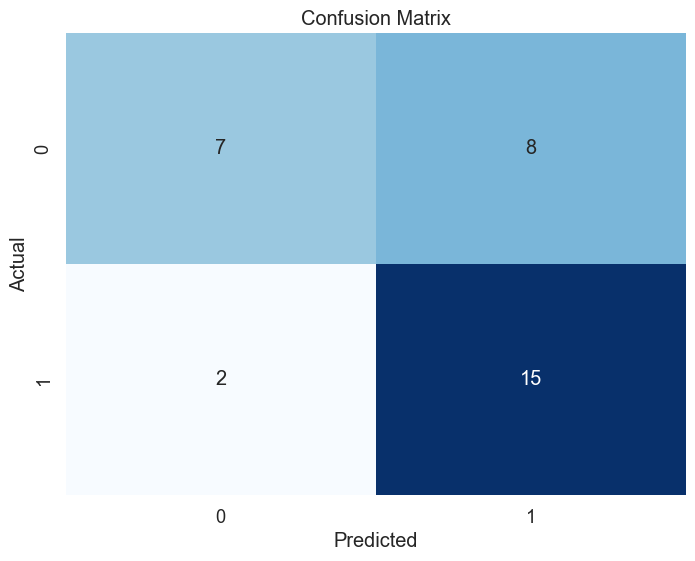

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust the font scale for better readability
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False,
            xticklabels=classifier.classes_, yticklabels=classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          159 non-null    object 
 1   Description   159 non-null    object 
 2   Amount        159 non-null    float64
 3   Food or not?  159 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 5.1+ KB


In [17]:
import pandas as pd
from sklearn.model_selection import LeaveOneOut
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Load your dataset
data = pd.read_csv('/Users/tergel.s/Downloads/bank.csv')

# Split the data into features (X) and target (y)
X = data['Description']  # Description as input feature
y = data['Food or not?']  # Food or not food as the target variable

# Initialize a LOOCV iterator
loo = LeaveOneOut()

# Initialize lists to store results
accuracies = []

# Iterate through the LOOCV splits
for train_index, val_index in loo.split(X):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    
    # Create a TF-IDF vectorizer for text data
    tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')

    # Fit and transform the vectorizer on the training data
    X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

    # Transform the validation data using the same vectorizer
    X_val_tfidf = tfidf_vectorizer.transform(X_val)

    # Initialize and train a Multinomial Naïve Bayes classifier
    classifier = MultinomialNB()
    classifier.fit(X_train_tfidf, y_train)

    # Predict the categories on the validation data
    y_pred = classifier.predict(X_val_tfidf)

    # Calculate accuracy for this fold
    accuracy = accuracy_score(y_val, y_pred)
    accuracies.append(accuracy)

# Calculate the average accuracy over all folds
average_accuracy = sum(accuracies) / len(accuracies)
print(f'Average Accuracy: {average_accuracy:.2f}')


Average Accuracy: 0.82


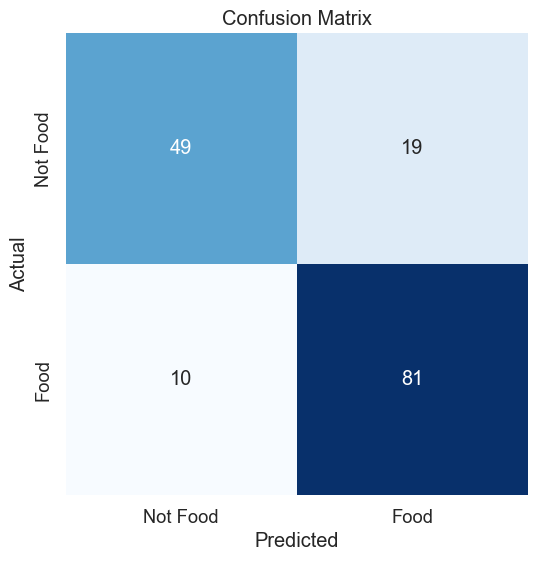

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import pandas as pd

# Assuming you already have the 'true_labels' and 'predicted_labels' from the previous code cell
# Create a confusion matrix
confusion = confusion_matrix(true_labels, predicted_labels)

# Define class labels (if you have them)
class_labels = ["Not Food", "Food"]

# Create a DataFrame for better visualization (optional)
confusion_df = pd.DataFrame(confusion, index=class_labels, columns=class_labels)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust the font scale for better readability
sns.heatmap(confusion_df, annot=True, fmt='d', cmap='Blues', cbar=False, square=True,
            xticklabels=True, yticklabels=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [20]:
#k=10
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np

# Load your dataset
data = pd.read_csv('/Users/tergel.s/Downloads/bank.csv')

# Split the data into features (X) and target (y)
X = data['Description']  # Description as input feature
y = data['Food or not?']  # Food or not food as the target variable

# Initialize a 10-fold cross-validation iterator with stratification
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store results
true_labels = []
predicted_labels = []

# Iterate through the 10-fold cross-validation splits
for train_index, val_index in kf.split(X, y):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    
    # Create a TF-IDF vectorizer for text data
    tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')

    # Fit and transform the vectorizer on the training data
    X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

    # Transform the validation data using the same vectorizer
    X_val_tfidf = tfidf_vectorizer.transform(X_val)

    # Initialize and train a Multinomial Naïve Bayes classifier
    classifier = MultinomialNB()
    classifier.fit(X_train_tfidf, y_train)

    # Predict the categories on the validation data
    y_pred = classifier.predict(X_val_tfidf)

    # Append true and predicted labels
    true_labels.extend(y_val)
    predicted_labels.extend(y_pred)

# Calculate and print the confusion matrix
confusion = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(confusion)

# Calculate and print the overall accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print(f'Overall Accuracy: {accuracy:.2f}')


Confusion Matrix:
[[51 17]
 [11 80]]
Overall Accuracy: 0.82


In [ ]:
 #so there is no damn difference between loocv and k cross validation?

In [21]:
# Assuming 'classifier' is the trained Multinomial Naïve Bayes classifier
feature_log_probs = classifier.feature_log_prob_
# Assuming 'tfidf_vectorizer' is the trained TF-IDF vectorizer
vocabulary = tfidf_vectorizer.get_feature_names_out()
num_top_words = 10  # Number of top words to display

for class_index, class_name in enumerate(classifier.classes_):
    top_word_indices = feature_log_probs[class_index, :].argsort()[-num_top_words:][::-1]
    top_words = [vocabulary[idx] for idx in top_word_indices]
    print(f"Top words for Class {class_name}: {', '.join(top_words)}")


Top words for Class 0: ventra, purchase, 08, 07, 09, chicago, cap, federal, il, mobile
Top words for Class 1: il, chicago, mobile, purchase, 06, 05, 07, target, 00032078, mcdonald
